In [11]:
import pandas as pd
import numpy as np
from late_fusion import *
from experimental_metrics import *
from single_modal_vector_retrieval import *
from early_fusion import *
from late_fusion import *
from metadata_graph import *
from random_sample import *
from itertools import combinations
%matplotlib inline

In [12]:

infos = pd.read_csv("dataset/id_information_mmsr.tsv", sep="\t")
retrieval = MultiModalLateFusionRetrieval()
inter_true = np.loadtxt("./predictions/binary_relevancy_matrix_0000.csv", delimiter="\t")

song_ids = infos['id'].tolist()
song_id_to_index = {song_id: idx for idx, song_id in enumerate(song_ids)}

In [13]:
def gen(idx, song_ids, song_id_to_index, feature_files, feature_weights):
    retrieval.load_and_normalize_features(feature_files)
    results = retrieval.batch_similarity_search(song_ids, top_k=100, fusion_method="weighted_average", weights=feature_weights)

    results_df = pd.DataFrame(results)

    inter_matr = np.zeros((len(infos), len(infos)))

    for idx, row in tqdm(results_df.iterrows(), desc="generate matrix", total=len(results_df)):
        source = row["source_id"]
        target = row["target_id"]
        inter_matr[song_id_to_index[source], song_id_to_index[target]] = row["similarity"]

    return inter_matr

In [14]:
feature_files = {
    'mfcc_bow': 'dataset/id_mfcc_bow_mmsr.tsv',
    #'mfcc_stats': 'dataset/id_mfcc_stats_mmsr.tsv',

    #'blf_correlation' : 'dataset/id_blf_correlation_mmsr.tsv',
    #'blf_spectral': 'dataset/id_blf_spectral_mmsr.tsv',
    #'blf_spectralcontrast': 'dataset/id_blf_spectralcontrast_mmsr.tsv',
    #'blf_deltaspectral': 'dataset/id_blf_deltaspectral_mmsr.tsv',
    #'blf_logfluc': 'dataset/id_blf_logfluc_mmsr.tsv',
    #'blf_vardeltaspectral': 'dataset/id_blf_vardeltaspectral_mmsr.tsv',

    #'ivec256': 'dataset/id_ivec256_mmsr.tsv',
    #'ivec512': 'dataset/id_ivec512_mmsr.tsv',
    #'ivec1024': 'dataset/id_ivec1024_mmsr.tsv',

    'musicnn': 'dataset/id_musicnn_mmsr.tsv',

    'lyrics_bert': 'dataset/id_lyrics_bert_mmsr.tsv',
    #'lyrics_tf-idf': 'dataset/id_lyrics_tf-idf_mmsr.tsv',
    #'lyrics_word2vec': 'dataset/id_lyrics_word2vec_mmsr.tsv',

    'resnet': 'dataset/id_resnet_mmsr.tsv',
    #'vgg': 'dataset/id_vgg19_mmsr.tsv',
    #'incp': 'dataset/id_incp_mmsr.tsv',
}

feature_weights = {    
    'mfcc_bow':                 0.6,
    #'mfcc_stats':              

    #'blf_correlation' :        
    #'blf_spectral':            
    #'blf_spectralcontrast':    
    #'blf_deltaspectral':       
    #'blf_logfluc':             
    #'blf_vardeltaspectral':    

    #'ivec256':                 
    #'ivec512':                 
    #'ivec1024':                

    'musicnn':                  0.4,

    'lyrics_bert':              0.5,
    #'lyrics_tf-idf':           
    #'lyrics_word2vec':         

    'resnet':                   0.3,
    #'vgg':                     
    #'incp':                    
}



In [17]:
feature_files_1 = {
    'mfcc_bow': 'dataset/id_mfcc_bow_mmsr.tsv',
    'musicnn': 'dataset/id_musicnn_mmsr.tsv',

    'lyrics_bert': 'dataset/id_lyrics_bert_mmsr.tsv',
    'lyrics_tf-idf': 'dataset/id_lyrics_tf-idf_mmsr.tsv',

    'resnet': 'dataset/id_resnet_mmsr.tsv',
    'vgg': 'dataset/id_vgg19_mmsr.tsv',
}

feature_weights_1 = {    
    'mfcc_bow':                 0.6,
    'musicnn':                  0.6,

    'lyrics_bert':              0.4,
    'lyrics_tf-idf':            0.4,

    'resnet':                   0.2,
    'vgg':                      0.2,
}

feature_keys = list(feature_files_1.keys())
all_combinations = {}

for r in range(4, len(feature_keys) + 1):
    for combo in combinations(feature_keys, r):
        all_combinations[combo] = {
            'files': {k: feature_files_1[k] for k in combo},
            'weights': {k: feature_weights_1[k] for k in combo}
        }


In [18]:
print(len(all_combinations))

evaluation = []
topK = 10


for i, combo in enumerate(all_combinations.items()):
    name, data = combo
    inter_pred = gen(i, song_ids, song_id_to_index, data['files'], data['weights'])

    ratk = recall_at_k(inter_pred, inter_true, k=topK)
    patk = precision_at_k(inter_pred, inter_true, k=topK)
    ndcgatk = ndcg_at_k(inter_pred, inter_true, k=topK)
    mean_rr = mrr(inter_pred, inter_true)
    evaluation.append({
        f"combinations": name,
        f"recall@{topK}": ratk,
        f"precision@{topK}": patk,
        f"ndcg@{topK}": ndcgatk,
        f"mrr": mean_rr
    })

22
Using 4 cores for batch similarity search.


generate matrix: 100%|██████████| 514800/514800 [00:22<00:00, 22460.86it/s]


Using 4 cores for batch similarity search.


generate matrix: 100%|██████████| 514800/514800 [00:22<00:00, 22805.58it/s]


Using 4 cores for batch similarity search.


generate matrix: 100%|██████████| 514800/514800 [00:21<00:00, 23643.70it/s]


Using 4 cores for batch similarity search.


generate matrix: 100%|██████████| 514800/514800 [00:22<00:00, 23354.75it/s]


Using 4 cores for batch similarity search.


generate matrix: 100%|██████████| 514800/514800 [00:20<00:00, 24556.57it/s]


Using 4 cores for batch similarity search.


generate matrix: 100%|██████████| 514800/514800 [00:21<00:00, 23778.44it/s]


Using 4 cores for batch similarity search.


generate matrix: 100%|██████████| 514800/514800 [00:21<00:00, 24033.37it/s]


Using 4 cores for batch similarity search.


generate matrix: 100%|██████████| 514800/514800 [00:20<00:00, 24580.28it/s]


Using 4 cores for batch similarity search.


generate matrix: 100%|██████████| 514800/514800 [00:22<00:00, 22696.78it/s]


Using 4 cores for batch similarity search.


generate matrix: 100%|██████████| 514800/514800 [00:31<00:00, 16489.60it/s]


Using 4 cores for batch similarity search.


generate matrix: 100%|██████████| 514800/514800 [00:31<00:00, 16090.49it/s]


Using 4 cores for batch similarity search.


generate matrix: 100%|██████████| 514800/514800 [00:23<00:00, 21933.33it/s]


Using 4 cores for batch similarity search.


generate matrix: 100%|██████████| 514800/514800 [00:21<00:00, 24427.39it/s]


Using 4 cores for batch similarity search.


generate matrix: 100%|██████████| 514800/514800 [00:21<00:00, 23613.37it/s]


Using 4 cores for batch similarity search.


generate matrix: 100%|██████████| 514800/514800 [00:20<00:00, 25077.21it/s]


Using 4 cores for batch similarity search.


generate matrix: 100%|██████████| 514800/514800 [00:20<00:00, 24985.04it/s]


Using 4 cores for batch similarity search.


generate matrix: 100%|██████████| 514800/514800 [00:21<00:00, 23991.02it/s]


Using 4 cores for batch similarity search.


generate matrix: 100%|██████████| 514800/514800 [00:20<00:00, 24600.23it/s]


Using 4 cores for batch similarity search.


generate matrix: 100%|██████████| 514800/514800 [00:21<00:00, 23798.67it/s]


Using 4 cores for batch similarity search.


generate matrix: 100%|██████████| 514800/514800 [00:21<00:00, 23893.07it/s]


Using 4 cores for batch similarity search.


generate matrix: 100%|██████████| 514800/514800 [00:20<00:00, 25025.01it/s]


Using 4 cores for batch similarity search.


generate matrix: 100%|██████████| 514800/514800 [00:20<00:00, 24516.84it/s]


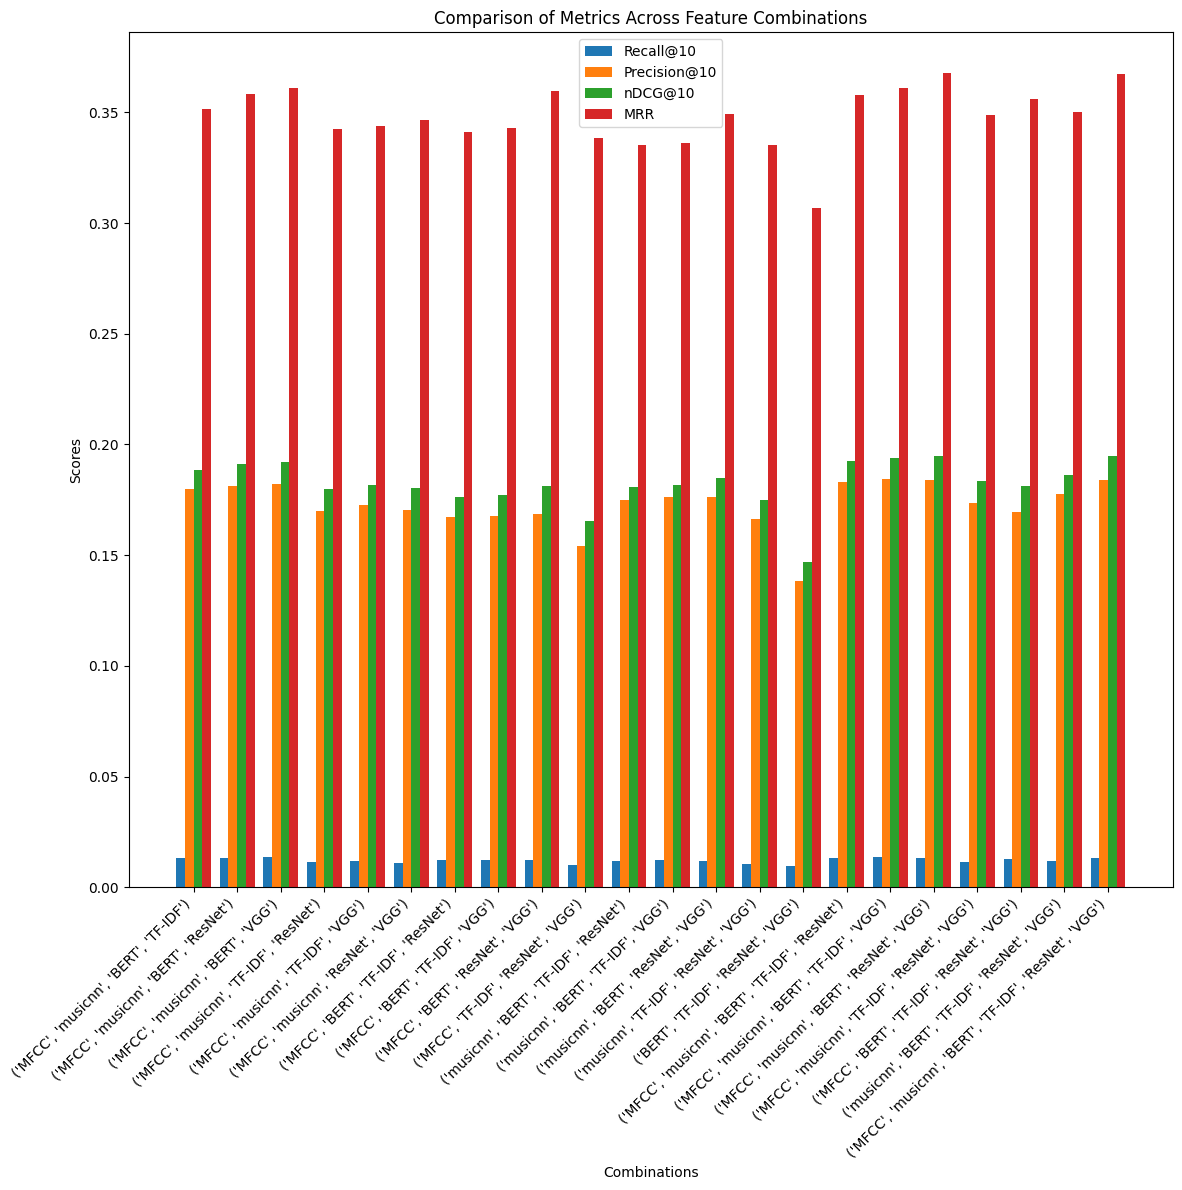

In [ ]:
evaluation_df = pd.DataFrame(evaluation)
evaluation_df.to_csv("evaluation.csv", index=False)
evaluation_df = pd.read_csv("evaluation.csv")

# Set figure size
plt.figure(figsize=(12, 12))

# Bar chart positions
x = np.arange(len(evaluation_df["combinations"]))
width = 0.2  # Width of bars

# Plot bars for each metric
plt.bar(x - width*1.5, evaluation_df["Recall@10"], width, label="Recall@10")
plt.bar(x - width/2, evaluation_df["Precision@10"], width, label="Precision@10")
plt.bar(x + width/2, evaluation_df["nDCG@10"], width, label="nDCG@10")
plt.bar(x + width*1.5, evaluation_df["MRR"], width, label="MRR")

# Formatting
plt.xticks(ticks = x, labels=evaluation_df["combinations"], rotation=45, ha="right")
plt.xlabel("Combinations")
plt.ylabel("Scores")
plt.title("Comparison of Metrics Across Feature Combinations")
plt.legend()
plt.tight_layout()

# Show plot
plt.show()
